# 0. Setting

In [1]:
import torch
import model

from opts import parse_opt
from misc.loss_wrapper import LossWrapper
from path_related_tool_box.feat_processing_for_prediction import *
opt = parse_opt()


Bad key text.latex.unicode in file /home/user_cl/anaconda3/envs/btc_network/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/user_cl/anaconda3/envs/btc_network/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/user_cl/anaconda3/envs/btc_network/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_

# 1. Fetch Corresponding Data

In [2]:
tmp_save_path = './tmp_Path_Graph_data/'
picked_node_id = 5841704807

AF_feat_batch, fr_path_feat, bk_path_feat, \
fr_intersect_edge, bk_intersect_edge, \
fr_intersect_feat, bk_intersect_feat = feat_process_for_predict(tmp_save_path, picked_node_id)

# 2. Test with Three models


Using Hack Model


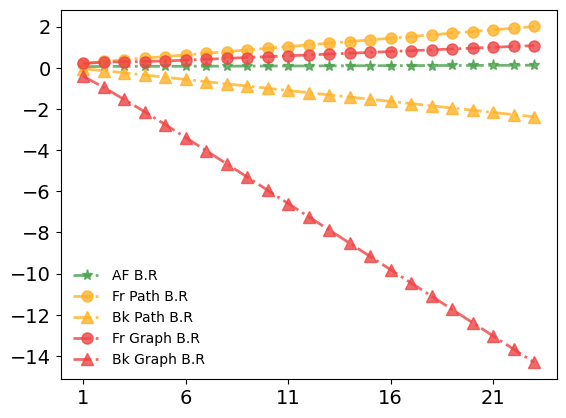

Hour 1 / Type Hack : Probability : 0.5
Hour 2 / Type Hack : Probability : 0.61
Hour 3 / Type Hack : Probability : 0.73
Hour 4 / Type Hack : Probability : 0.84
Hour 5 / Type Hack : Probability : 0.91
Hour 6 / Type Hack : Probability : 0.95
Hour 7 / Type Hack : Probability : 0.97
Hour 8 / Type Hack : Probability : 0.98
Hour 9 / Type Hack : Probability : 0.99
Hour 10 / Type Hack : Probability : 1.0
Hour 11 / Type Hack : Probability : 1.0
Hour 12 / Type Hack : Probability : 1.0
Hour 13 / Type Hack : Probability : 1.0
Hour 14 / Type Hack : Probability : 1.0
Hour 15 / Type Hack : Probability : 1.0
Hour 16 / Type Hack : Probability : 1.0
Hour 17 / Type Hack : Probability : 1.0
Hour 18 / Type Hack : Probability : 1.0
Hour 19 / Type Hack : Probability : 1.0
Hour 20 / Type Hack : Probability : 1.0
Hour 21 / Type Hack : Probability : 1.0
Hour 22 / Type Hack : Probability : 1.0
Hour 23 / Type Hack : Probability : 1.0

Using Ransomware Model


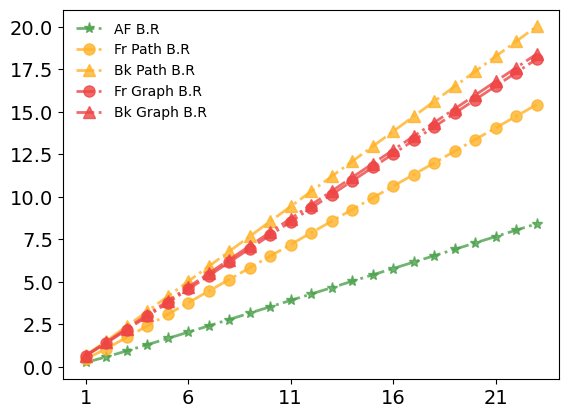

Hour 1 / Type Ransomware : Probability : 0.06
Hour 2 / Type Ransomware : Probability : 0.06
Hour 3 / Type Ransomware : Probability : 0.06
Hour 4 / Type Ransomware : Probability : 0.06
Hour 5 / Type Ransomware : Probability : 0.06
Hour 6 / Type Ransomware : Probability : 0.06
Hour 7 / Type Ransomware : Probability : 0.06
Hour 8 / Type Ransomware : Probability : 0.06
Hour 9 / Type Ransomware : Probability : 0.06
Hour 10 / Type Ransomware : Probability : 0.06
Hour 11 / Type Ransomware : Probability : 0.06
Hour 12 / Type Ransomware : Probability : 0.06
Hour 13 / Type Ransomware : Probability : 0.06
Hour 14 / Type Ransomware : Probability : 0.06
Hour 15 / Type Ransomware : Probability : 0.06
Hour 16 / Type Ransomware : Probability : 0.06
Hour 17 / Type Ransomware : Probability : 0.06
Hour 18 / Type Ransomware : Probability : 0.06
Hour 19 / Type Ransomware : Probability : 0.06
Hour 20 / Type Ransomware : Probability : 0.06
Hour 21 / Type Ransomware : Probability : 0.06
Hour 22 / Type Ransomw

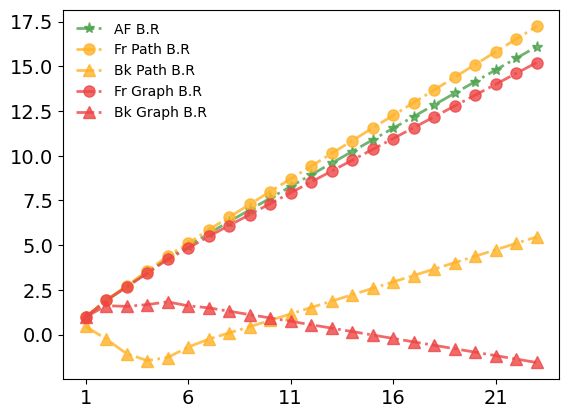

Hour 1 / Type Darknet : Probability : 0.01
Hour 2 / Type Darknet : Probability : 0.01
Hour 3 / Type Darknet : Probability : 0.01
Hour 4 / Type Darknet : Probability : 0.01
Hour 5 / Type Darknet : Probability : 0.01
Hour 6 / Type Darknet : Probability : 0.01
Hour 7 / Type Darknet : Probability : 0.01
Hour 8 / Type Darknet : Probability : 0.01
Hour 9 / Type Darknet : Probability : 0.01
Hour 10 / Type Darknet : Probability : 0.01
Hour 11 / Type Darknet : Probability : 0.01
Hour 12 / Type Darknet : Probability : 0.01
Hour 13 / Type Darknet : Probability : 0.01
Hour 14 / Type Darknet : Probability : 0.01
Hour 15 / Type Darknet : Probability : 0.01
Hour 16 / Type Darknet : Probability : 0.01
Hour 17 / Type Darknet : Probability : 0.01
Hour 18 / Type Darknet : Probability : 0.01
Hour 19 / Type Darknet : Probability : 0.01
Hour 20 / Type Darknet : Probability : 0.01
Hour 21 / Type Darknet : Probability : 0.01
Hour 22 / Type Darknet : Probability : 0.01
Hour 23 / Type Darknet : Probability : 0.

In [3]:
# 2. Load all models
for illicit_name in ['Hack', 'Ransomware', 'Darknet']:
    print(f'\nUsing {illicit_name} Model')
    opt.illicit_name = illicit_name
    opt.id = opt.illicit_name
    opt.batch_size = 1

    # Load Model
    model_core = model.setup(opt)
    dp_lw_model = LossWrapper(model_core, opt)
    dp_lw_model.load_state_dict(torch.load(os.path.join(opt.start_from, f'{opt.illicit_name}.pth')))
    dp_lw_model = dp_lw_model.cuda()
    dp_lw_model.eval()

    # Testing
    labels_holder = torch.ones([1,1], dtype=torch.float32).cuda()
    loss_amp_holder = torch.ones([1,1], dtype=torch.float32).cuda()
    with torch.no_grad():
        out, each_split_prediction, ground_labels = \
            dp_lw_model([AF_feat_batch, fr_path_feat, bk_path_feat,
                         fr_intersect_edge, bk_intersect_edge, fr_intersect_feat, bk_intersect_feat],
                         labels_holder, loss_amp_holder, return_pred_switch=True, eval_switch=False)
    prediction = each_split_prediction.detach().cpu().tolist()[0]
    for hour_idx in range(23):
        print(f'Hour {hour_idx+1} / Type {illicit_name} : Probability : {round(float(prediction[hour_idx]), 2)}')

    # Clean up
    del dp_lw_model, model_core